In [1]:
import importlib
from importlib import reload
import ursse.sync_motion_simulation as sms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%%time
rf_noise = 7e-5
nbins = 40
model = sms.Model(rf_noise_std=rf_noise)
res = model.simulate(load=True)
model.spad_tts = 0.000
res = model.add_spad_tts_do_fitting_and_binning(verbose=True)
hist_dic_no_spad = model.get_meas_sim_comparison(feature="amplitude", nbins=nbins)

model = sms.Model(rf_noise_std=rf_noise)
res = model.simulate(load=True)
model.spad_tts = 0.350
res = model.add_spad_tts_do_fitting_and_binning(verbose=True)
hist_dic_with_spad = model.get_meas_sim_comparison(feature="amplitude", nbins=nbins)

working on 1 out of 5
working on 2 out of 5
working on 3 out of 5
working on 4 out of 5
working on 5 out of 5
working on file number 1 out of 5
working on file number 2 out of 5
working on file number 3 out of 5
working on file number 4 out of 5
working on file number 5 out of 5
working on 1 out of 5
working on 2 out of 5
working on 3 out of 5
working on 4 out of 5
working on 5 out of 5
working on file number 1 out of 5
working on file number 2 out of 5
working on file number 3 out of 5
working on file number 4 out of 5
working on file number 5 out of 5
CPU times: user 4min 9s, sys: 41.6 s, total: 4min 51s
Wall time: 4min 53s


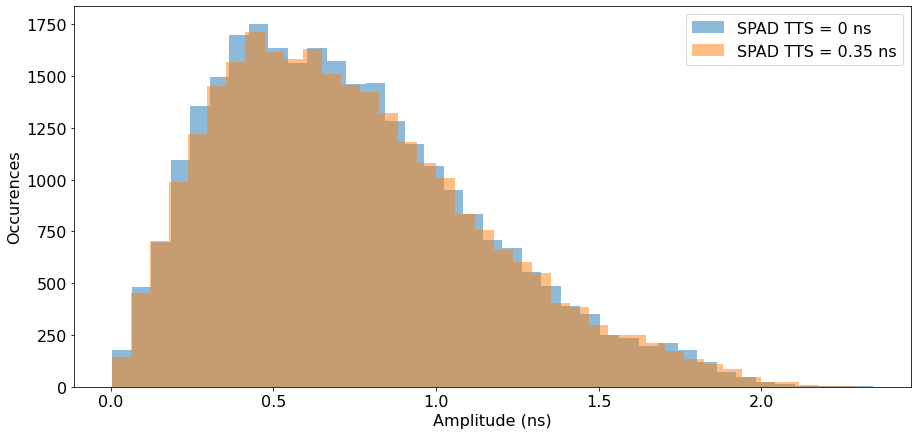

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
for dic, lab in zip([hist_dic_no_spad, hist_dic_with_spad], ["SPAD TTS = 0 ns", "SPAD TTS = 0.35 ns"]):
    ax.hist(dic['bin_centers'], weights=dic['aggregated_hists']['sim'], bins=dic['bins'], label=lab, alpha=0.5)
ax.set_ylabel("Occurences")
ax.set_xlabel("Amplitude (ns)")
ax.legend()

# I would say they are almost identical. So the effect of SPAD TTS on the reconstructed Amplitude is almost negligible